In [1]:
!wget https://raw.githubusercontent.com/joestubbs/coe379L-fa25/main/datasets/unit01/project1.csv

--2025-10-07 17:55:40--  https://raw.githubusercontent.com/joestubbs/coe379L-fa25/main/datasets/unit01/project1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15744657 (15M) [text/plain]
Saving to: ‘project1.csv.6’

project1.csv.6      100%[===================>]  15.01M  --.-KB/s    in 0.1s    

2025-10-07 17:55:40 (109 MB/s) - ‘project1.csv.6’ saved [15744657/15744657]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipykernel_5758/2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('project1.csv')
df.head()


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [4]:
df.shape

(131165, 12)

In [5]:
df.size

1573980

In [6]:
#Getting insight into data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [7]:
#in order to remove dupe rows, I'll force IDs to be unique, also we will have to switch the
#categorical data using one-hot encoding and switch datetime to something parseable
df = df.drop_duplicates(subset=['Animal ID'], keep='first')
df.shape

(121258, 12)

In [8]:
#Normally we would have to clean nulls, but the two values that have nulls are dropped anyways.
df.drop(['Name', 'Outcome Subtype'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121258 entries, 0 to 131164
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         121258 non-null  object
 1   Date of Birth     121258 non-null  object
 2   DateTime          121258 non-null  object
 3   MonthYear         121258 non-null  object
 4   Outcome Type      121223 non-null  object
 5   Animal Type       121258 non-null  object
 6   Sex upon Outcome  121258 non-null  object
 7   Age upon Outcome  121258 non-null  object
 8   Breed             121258 non-null  object
 9   Color             121258 non-null  object
dtypes: object(10)
memory usage: 10.2+ MB


In [9]:
df.head(100)

,Animal ID,Date of Birth,DateTime,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Bird,Unknown,2 weeks,Duck,Yellow/Black
...,...,...,...,...,...,...,...,...,...,...
95,A705626,4/19/15,2015-06-19T00:00:00-05:00,Jun-15,Transfer,Dog,Unknown,1 month,Boxer Mix,Black
96,A705627,4/19/15,2015-06-19T00:00:00-05:00,Jun-15,Transfer,Dog,Unknown,1 month,Boxer Mix,Black
97,A705628,4/19/15,2015-06-19T00:00:00-05:00,Jun-15,Transfer,Dog,Unknown,1 month,Boxer Mix,Black
98,A705629,4/19/15,2015-06-19T00:00:00-05:00,Jun-15,Transfer,Dog,Unknown,1 month,Boxer Mix,Black


In [10]:
#seems like there's a lot of unknowns for sex upon outcome, we should check
print((df["Sex upon Outcome"] == "Unknown").sum())

5093


In [11]:
#since its 5093 I think it's ok if we drop it, there's no point in trying to predict it reliablydf =
df = df.drop((df[df["Sex upon Outcome"] == "Unknown"]).index)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116165 entries, 8 to 131164
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         116165 non-null  object
 1   Date of Birth     116165 non-null  object
 2   DateTime          116165 non-null  object
 3   MonthYear         116165 non-null  object
 4   Outcome Type      116134 non-null  object
 5   Animal Type       116165 non-null  object
 6   Sex upon Outcome  116165 non-null  object
 7   Age upon Outcome  116165 non-null  object
 8   Breed             116165 non-null  object
 9   Color             116165 non-null  object
dtypes: object(10)
memory usage: 9.7+ MB


In [13]:
#There's only a few na vales for outcome type so ill delete those too
df = df.dropna(subset=['Outcome Type'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116134 entries, 8 to 131164
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         116134 non-null  object
 1   Date of Birth     116134 non-null  object
 2   DateTime          116134 non-null  object
 3   MonthYear         116134 non-null  object
 4   Outcome Type      116134 non-null  object
 5   Animal Type       116134 non-null  object
 6   Sex upon Outcome  116134 non-null  object
 7   Age upon Outcome  116134 non-null  object
 8   Breed             116134 non-null  object
 9   Color             116134 non-null  object
dtypes: object(10)
memory usage: 9.7+ MB


In [15]:
#Doing some univariate analysis
print(df['Animal Type'].describe())


count     116134
unique         4
top          Dog
freq       60155
Name: Animal Type, dtype: object


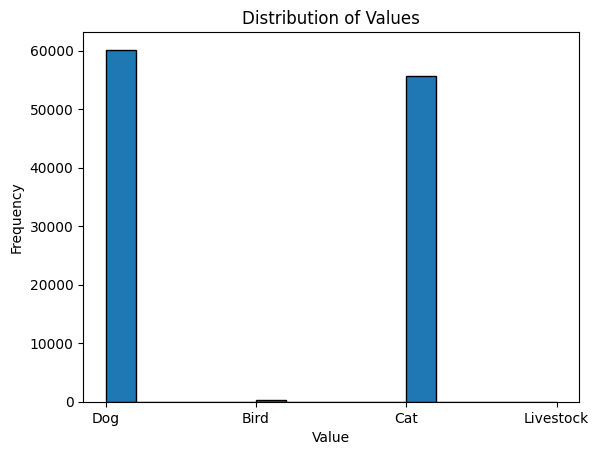

In [16]:
#checking some distributions
plt.hist(df["Animal Type"], bins=15, edgecolor='black') # 'bins' controls the number of bars, 'edgecolor' adds borders

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values")

# Display the histogram
plt.show()

#Seems like there is almost all dogs and cats, and then a few birds


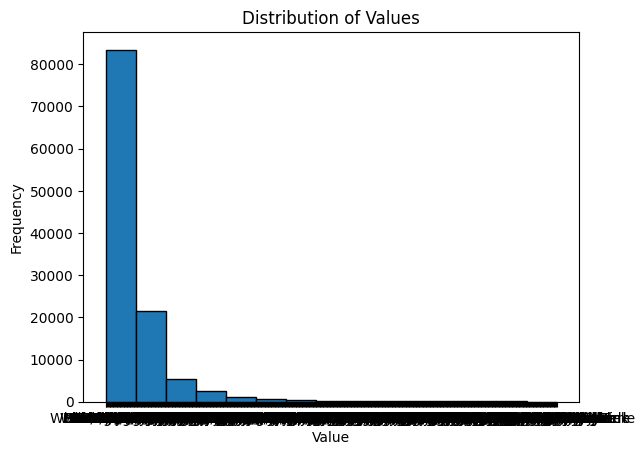

In [17]:
plt.hist(df["Color"], bins=15, edgecolor='black') # 'bins' controls the number of bars, 'edgecolor' adds borders

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values")

# Display the histogram
plt.show()
#There's a lot of Colors, ans also breeds (I checked earlier)

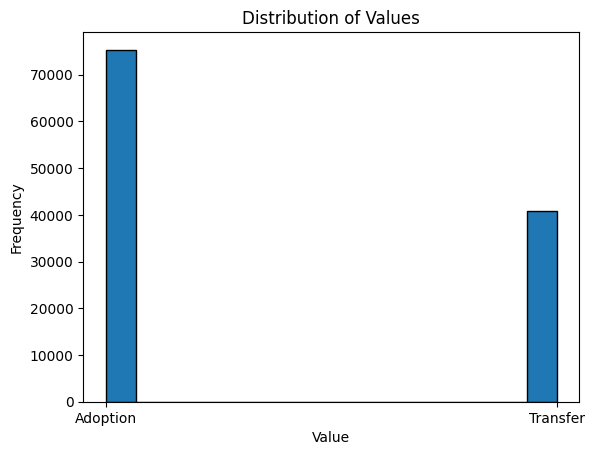

In [18]:
plt.hist(df["Outcome Type"], bins=15, edgecolor='black') # 'bins' controls the number of bars, 'edgecolor' adds borders

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values")

# Display the histogram
plt.show()
#There's decent distribution between what we are trying to find and also it's one or the other


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116134 entries, 8 to 131164
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         116134 non-null  object
 1   Date of Birth     116134 non-null  object
 2   DateTime          116134 non-null  object
 3   MonthYear         116134 non-null  object
 4   Outcome Type      116134 non-null  object
 5   Animal Type       116134 non-null  object
 6   Sex upon Outcome  116134 non-null  object
 7   Age upon Outcome  116134 non-null  object
 8   Breed             116134 non-null  object
 9   Color             116134 non-null  object
dtypes: object(10)
memory usage: 9.7+ MB


In [20]:
#Since the dates are equivalent, I'll only use one, and ID is also irrelevant
df = df.drop(['MonthYear', 'Animal ID'], axis = 1)

In [21]:
df.head(50)

,Date of Birth,DateTime,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
8,4/22/14,2014-07-11T00:00:00-05:00,Adoption,Dog,Spayed Female,2 months,Black Mouth Cur Mix,Brown/Black
11,3/13/14,2014-08-20T00:00:00-05:00,Transfer,Bird,Intact Male,5 months,Silkie Mix,Black
17,12/14/13,2014-12-23T00:00:00-05:00,Transfer,Dog,Intact Male,1 year,Chihuahua Shorthair Mix,Brown/White
18,6/20/13,2014-12-23T00:00:00-05:00,Transfer,Bird,Intact Male,1 year,Chicken Mix,Brown/Black
19,4/22/14,2014-12-27T00:00:00-05:00,Transfer,Dog,Intact Male,8 months,Shiba Inu Mix,Tan
20,12/7/14,2014-12-29T00:00:00-05:00,Transfer,Cat,Intact Female,3 weeks,Domestic Shorthair Mix,Blue Tabby
21,12/7/14,2014-12-29T00:00:00-05:00,Transfer,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Blue Tabby
22,12/27/08,2015-01-01T00:00:00-05:00,Transfer,Dog,Neutered Male,6 years,Chihuahua Shorthair Mix,Cream
23,12/25/14,2015-01-02T00:00:00-05:00,Transfer,Cat,Intact Female,1 weeks,Domestic Shorthair Mix,Black/White
24,8/31/11,2015-01-12T00:00:00-05:00,Transfer,Dog,Spayed Female,3 years,Golden Retriever/Labrador Retriever,Gold


In [22]:
print(df["DateTime"].min())
#making the age upon outcome days
ages = []
for age in df["Age upon Outcome"]:
    vars = age.lower().split()
    daysCount = 0
    if(vars[1] == "months" or vars[1] == "month"):
        daysCount = 30
    elif(vars[1] == "years" or vars[1] == "year"):
        daysCount = 365
    else:
        daysCount = 7
    daysCount *= float(vars[0])
    ages.append(daysCount)
df["Age upon Outcome"] = ages
    


2013-10-01T09:31:00


In [41]:
df.head()

,Outcome Type,Age upon Outcome,Days to Outcome,Days since Born,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,...,Color_Yellow/Black,Color_Yellow/Blue,Color_Yellow/Brown,Color_Yellow/Cream,Color_Yellow/Green,Color_Yellow/Orange,Color_Yellow/Red,Color_Yellow/Tan,Color_Yellow/White,Color_Yellow/Yellow
8,Adoption,60.0,282.0,8248.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,Transfer,150.0,322.0,8208.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
17,Transfer,365.0,447.0,8119.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
18,Transfer,365.0,447.0,7942.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
19,Transfer,240.0,451.0,8248.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131159,Transfer,365.0,116.0,7792.0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
131160,Transfer,730.0,126.0,7436.0,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
131161,Transfer,1825.0,130.0,6345.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
131163,Transfer,30.0,176.0,8183.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
#converting date time to days since earliest date (encompasses everything), using UTC to allow standardization between time zones
df["DateTime"] = pd.to_datetime(df["DateTime"], format="mixed", utc=True)
df["Days to Outcome"] = (df["DateTime"] - df["DateTime"].min()).dt.days
#computing relative oldness
df["Date of Birth"] = pd.to_datetime(df["Date of Birth"], format="mixed", utc=True) 
df["Days since Born"] = (df["Date of Birth"] - df["Date of Birth"].min()).dt.days

In [25]:
#dropping date time now
df = df.drop(["DateTime", "Date of Birth"], axis = 1)

In [26]:
df["Days since Born"] = df["Days since Born"].astype(float)
df["Days to Outcome"] = df["Days to Outcome"].astype(float)

In [27]:
#performing one hot encoding on the categorical data, not doing breed because we drop it anyway
df = pd.get_dummies(df, columns=["Animal Type", "Sex upon Outcome", "Color"])

In [28]:
df.shape

(116134, 596)

In [29]:
df = df.drop("Breed", axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop("Outcome Type", axis = 1)
Y = df["Outcome Type"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 67, stratify=Y)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [33]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred_normKNN = knn.predict(x_test)
print(classification_report(y_test, y_pred_normKNN))

              precision    recall  f1-score   support

    Adoption       0.75      0.92      0.82      7535
    Transfer       0.73      0.43      0.54      4079

    accuracy                           0.74     11614
   macro avg       0.74      0.67      0.68     11614
weighted avg       0.74      0.74      0.72     11614



In [34]:
#Now for the grid search CV one
param_grid = {"n_neighbors": np.arange(1, 20)}
knn_GSCV = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,
    verbose=2)
knn_GSCV.fit(x_train, y_train)
print(knn_GSCV.best_params_)



Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ......................................n_neighbors=1; total time=  58.2s
[CV] END ......................................n_neighbors=1; total time=  58.8s
[CV] END ......................................n_neighbors=1; total time=  58.9s
[CV] END ......................................n_neighbors=1; total time=  59.6s
[CV] END ......................................n_neighbors=1; total time=  57.7s
[CV] END ......................................n_neighbors=2; total time=  58.6s
[CV] END ......................................n_neighbors=2; total time=  58.4s
[CV] END ......................................n_neighbors=2; total time=  59.4s
[CV] END ......................................n_neighbors=2; total time=  57.4s
[CV] END ......................................n_neighbors=2; total time=  57.7s
[CV] END ......................................n_neighbors=3; total time=  59.1s
[CV] END ......................................n

In [35]:
y_predGSCV = knn_GSCV.predict(x_test)
print(classification_report(y_test, y_predGSCV))

              precision    recall  f1-score   support

    Adoption       0.77      0.93      0.84      7535
    Transfer       0.79      0.49      0.61      4079

    accuracy                           0.78     11614
   macro avg       0.78      0.71      0.73     11614
weighted avg       0.78      0.78      0.76     11614



In [42]:
from sklearn.linear_model import SGDClassifier
linClass = SGDClassifier(loss="perceptron", alpha=0.05, random_state=67)
linClass.fit(x_train, y_train)

SGDClassifier(alpha=0.05, loss='perceptron', random_state=67)

In [43]:
y_predLinClass = linClass.predict(x_test)
print(classification_report(y_test, y_predLinClass))

              precision    recall  f1-score   support

    Adoption       0.65      1.00      0.79      7535
    Transfer       0.00      0.00      0.00      4079

    accuracy                           0.65     11614
   macro avg       0.32      0.50      0.39     11614
weighted avg       0.42      0.65      0.51     11614



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Logisitic regression was the best by far. In this case, the metric that is most important is accracy as we are weighting both adoption and transfer as equally important to the shelter. Predicting what the outcome is allows them to optimize certain strategies for finding foster parents for pets and increase revenue.